In [1]:
%matplotlib inline
from dataset_utils import copy_base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
import librosa
metadata_path = os.path.join(copy_base, 'metadata.csv')
files = librosa.util.find_files(copy_base, ['mp3', 'm4a', 'wav'])
#
# labels = []

filename = np.random.choice(files)
filename_new = filename.strip(copy_base)
pd.set_option('display.max_columns', 500)
df = pd.read_csv(metadata_path, sep='\n')
df[['Path', 'Artist', 'Raga', 'RagaId', 'fileId']] = df['Path,Artist,Raga,RagaId,fileId'].str.split(',', expand=True)
df = df.drop(columns=['Path,Artist,Raga,RagaId,fileId'])
df = df.set_index('Path')
df.index.unique()
pd.DataFrame.drop_duplicates(df, keep='last', inplace=True)
df.loc[filename_new, 'Artist']

'Prasanna_Venkataraman'

In [7]:
from numba import njit
pcds = []

for  file_ in  files:
    # file_ = np.random.choice(files)
    y, sr = librosa.load(file_)#, duration=5.0)
    y = y[-6000:]
    y_harm, y_perc = librosa.effects.hpss(y)

    chroma_cqt = librosa.feature.chroma_cens(y_harm, sr=sr, bins_per_octave=12)
    pcds.append(chroma_cqt)

pcds[0].shape

/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/pitch.py:153: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn("Trying to estimate tuning from empty frequency set.")
/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=256 is too small for input signal of length=188
  n_fft, y.shape[-1]
/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=256 is too small for input signal of length=94
  n_fft, y.shape[-1]
/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/theko/.co

(12, 12)

In [1]:
import librosa
import numpy as np
import  platform_details
from dataset_utils import get_metadata, get_Raga_ID
filtered_files = []
sankarabharanam = []
bhairavi = []
celtic = []
pcds = []
base_path = platform_details.get_platform_path(r"Users/theko/Documents/Dataset")
#
def file_filterer(file_):
  curr_raga = get_Raga_ID((get_metadata(file_)[1]))
  print(curr_raga)
  if curr_raga in (3, 22, 41):
    filtered_files.append(file_)
    if curr_raga == 3:
        bhairavi.append(file_)
    elif curr_raga == 22:
        sankarabharanam.append(file_)
    elif curr_raga == 41:
        celtic.append(file_)


files = librosa.util.find_files(base_path)
# Parallel(n_jobs=-2)(delayed(file_filterer)(file_) for  file_ in  files)
print(files)
for file_ in files:
    file_filterer(file_)
# file_ = np.random.choice(files)
# curr_raga = get_metadata_windows(file_)[1]
# print(f"Raga:{curr_raga}", get_Raga_ID(curr_raga))
#

['/mnt/c/Users/theko/Documents/Dataset/001001001/Sadaanandamu.mp3', '/mnt/c/Users/theko/Documents/Dataset/001002001/Siddhi_Vinayakam.mp3', '/mnt/c/Users/theko/Documents/Dataset/001010001/Maamava_Karunaya.mp3', '/mnt/c/Users/theko/Documents/Dataset/001017001/Siddhi_Vinayakam.mp3', '/mnt/c/Users/theko/Documents/Dataset/001019001/Vaddhane.mp3', '/mnt/c/Users/theko/Documents/Dataset/001026001/Vilayada_Idu_Nerama.mp3', '/mnt/c/Users/theko/Documents/Dataset/001035001/Velan_Varuvaradi.mp3', '/mnt/c/Users/theko/Documents/Dataset/001038001/Viruttam_-_Vizhikkuthunai_followed_by_Saravanabhava.mp3', '/mnt/c/Users/theko/Documents/Dataset/001047001/Kandanai_Nesithaal.mp3', '/mnt/c/Users/theko/Documents/Dataset/001055001/Kannanai_Pani_Maname.mp3', '/mnt/c/Users/theko/Documents/Dataset/001057001/Mariveradikkevaraiya_Rama.mp3', '/mnt/c/Users/theko/Documents/Dataset/001060001/Mamava_Karunaya.mp3', '/mnt/c/Users/theko/Documents/Dataset/002003001/Brindavana_Dolagaaduva.mp3', '/mnt/c/Users/theko/Documents/

In [2]:
sankarabharanam = np.array(sankarabharanam)
print(len(sankarabharanam), len(celtic))

# import audio_utils
# for s in sankarabharanam:
#     audio_utils.cut_file_1min_segments(s)
# for b in bhairavi:
#     audio_utils.cut_file_1min_segments(b)
# for c in celtic:
#     audio_utils.cut_file_1min_segments(c)

12 22


In [3]:
import librosa
import torch
import torchaudio

files = librosa.util.find_files(base_path, ext=['wav'])
signals = []
srs= []
for fname in files:
    y, sr = torchaudio.load(fname)
    signals.append(y)
    srs.append(sr)

signals[0].shape

36

In [2]:
import numpy as np
from dataset_utils import copy_base, get_Raga, get_Raga_ID
import os
files = [name for name in os.listdir(copy_base) if os.path.isdir(os.path.join(copy_base, name))]
sankarabharanam = []
bhairavi = []
celtic = []
filtered_files = []
def file_filterer(file_):
  curr_raga = get_Raga_ID(file_)
  if curr_raga in (3, 22, 41):
    filtered_files.append(file_)
    if curr_raga == 3:
        bhairavi.append(file_)
    elif curr_raga == 22:
        sankarabharanam.append(file_)
    elif curr_raga == 41:
        celtic.append(file_)


for file_ in files:
    file_filterer(file_)

In [3]:
from audio_utils import cut_file_1min_segments
print(len(sankarabharanam), len(filtered_files))
for f in sankarabharanam:
    dir_path = os.path.join(copy_base, f)
    audio_path = os.path.join(dir_path, os.listdir(dir_path)[0])
    cut_file_1min_segments(audio_path)

12 36


In [3]:
import dataset_utils
for f in sankarabharanam:
    dir_path = os.path.join(copy_base, f)
    audio_path = os.path.join(dir_path, os.listdir(dir_path)[0])
    sample = dataset_utils.load_audio_files(f, n='all')
    print(sample)

['/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out000.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out001.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out002.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out003.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out004.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out005.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out006.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out007.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out008.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out009.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out010.wav'
 '/mnt/c/Users/theko/Documents/Dataset/022004001/Akshayalinga_Vibho_out011.wav'
 '/mnt/c/Users/theko/Documents/Dataset/0

[(10,), (25,), (35,), (7,), (30,), (61,), (52,), (20,), (21,), (6,), (9,), (48,)]
[(31,), (32,), (31,), (14,), (24,), (26,), (9,), (31,), (9,), (49,), (24,), (10,)]


/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
/home/theko/.conda/envs/raga/lib/python3.7/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundF

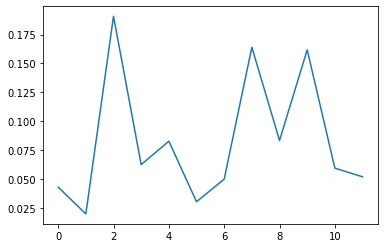

In [3]:
%matplotlib inline
import main
import matplotlib.pyplot as plt
import numpy as np

data = main.make_dataset((3, 22, 41))
audios = main.get_audios(data[0])
audios_1 = main.get_audios(data[1])
# pcds = calculate_pcd(data)
print([audios[i].shape for i in range(len(audios))])
print([audios_1[i].shape for i in range(len(audios_1))])
pcds = np.zeros(12, dtype='float32')
for audio in audios:
    pcds += main.get_pcd(audio)
pcds /= len(audios)
X = np.arange(12)
plt.plot(X, pcds)
plt.show()